In [1]:
! pip install progressbar2

In [2]:
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup as bs
import numpy as np
from datetime import datetime, timedelta
from progressbar import progressbar
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy import spatial
import os

### 한글처리

In [3]:
import matplotlib as mpl

print ('version: ', mpl.__version__)
print ('cache path: ', mpl.get_cachedir())


version:  3.0.2
cache path:  C:\Users\admin\.matplotlib


In [4]:
# ! mkdir ~/fonts && cd ~/fonts && wget http://ponce.cc/slackware/sources/repo/NanumFont_TTF_ALL.zip && unzip NanumFont_TTF_ALL.zip && pwd

In [5]:
import platform
#from matplotlib import font_manager, rc
from matplotlib import font_manager as fm

# 폰트 변경시 마이너스 깨지는 문제 수정
plt.rcParams['axes.unicode_minus'] = False 

font_size = 12   # font size 입력
#win_path = "c:/Windows/Fonts/malgun.ttf"

# 시스템에 저장되어있는 고딕폰트 목록 가져오기
#gothic_fonts = [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gothic' in f.name]
#print(gothic_fonts)

# plt전역에 폰트 지정
if platform.system()=='Darwin':
    plt.rcParams['font.family'] = "AppleGothic"
elif platform.system() == 'Windows' :
    
    font_dirs = os.path.join(os.environ['WINDIR'], 'Fonts')
    font_files = fm.findSystemFonts(fontpaths=font_dirs)
    font_list = fm.createFontList(font_files)
    print(font_list)
    
    plt.rcParams['font.family'] = "New Gulim"
elif platform.system() == 'Linux':
    font_dirs = ['/home/nbuser/fonts', ]
    # System font 찾는 경로를 설정
    font_files = fm.findSystemFonts(fontpaths=font_dirs)
    # 폰트 파일로 부터 폰트 리스트를 생성
    font_list = fm.createFontList(font_files)
    print(font_list)
    # matplotlib fontManager의 ttflist에 생성한 폰트리스트를 추가
    fm.fontManager.ttflist.extend(font_list)
    plt.rcParams['font.family'] = "NanumGothic"
else :

    print('Unknown')

plt.rcParams["font.size"] = font_size

[<Font 'Jokerman' (JOKERMAN.TTF) normal normal 400 normal>, <Font 'Microsoft PhagsPa' (phagspab.ttf) normal normal bold normal>, <Font 'Magic R' (HMKMMAG.TTF) normal normal 400 normal>, <Font 'Brush Script MT' (BRUSHSCI.TTF) italic normal 400 normal>, <Font 'Bodoni MT' (BOD_I.TTF) italic normal 400 normal>, <Font 'Bookshelf Symbol 7' (BSSYM7.TTF) normal normal book normal>, <Font 'Niagara Solid' (NIAGSOL.TTF) normal normal 400 normal>, <Font 'HoloLens MDL2 Assets' (holomdl2.ttf) normal normal 400 normal>, <Font 'Segoe Print' (segoeprb.ttf) normal normal bold normal>, <Font 'Californian FB' (CALIFR.TTF) normal normal 400 normal>, <Font 'HYMyeongJo-Extra' (H2MJRE.TTF) normal normal 400 normal>, <Font 'Informal Roman' (INFROMAN.TTF) normal normal roman normal>, <Font 'Leelawadee UI' (LeelawUI.ttf) normal normal 400 normal>, <Font 'Goudy Old Style' (GOUDOS.TTF) normal normal 400 normal>, <Font 'Tw Cen MT Condensed' (TCCB____.TTF) normal normal bold condensed>, <Font 'Leelawadee UI' (LeelaU

### Load Dataset

In [7]:
work = pd.read_csv("IPO_Factors.csv", encoding = 'euckr').iloc[:,1:]

In [8]:
work

,코드,종목명,확정공모가,상장일,F01_시장구분,F02_코넥스,F03_중국,F04_시가총액,F05_밴드대비,F06_기관확약,...,F11_상장월_9,F11_상장월_10,F11_상장월_11,F11_상장월_12,F12_해당월,F13_직전수익률,F14_기관경쟁률,F15_공모경쟁률,P3_시초Rate,P4_종가Rate
0,A099750,이지케어텍,12300,2019-03-22,0.0,0.0,0.0,1.0,4.0,4.0,...,0,0,0,0,3.243184,1.982634,5.0,5.0,100.0,29.9
1,A307950,현대오토에버,48000,2019-03-28,5.0,0.0,0.0,5.0,5.0,5.0,...,0,0,0,0,3.243184,1.982634,5.0,4.0,57.3,17.5
2,A228760,지노믹트리,27000,2019-03-27,0.0,5.0,0.0,4.0,5.0,4.0,...,0,0,0,0,3.243184,1.982634,4.0,1.0,9.1,-7.3
3,A299660,셀리드,33000,2019-02-20,0.0,0.0,0.0,3.0,5.0,3.0,...,0,0,0,0,1.831020,1.982634,5.0,5.0,32.6,16.8
4,A278280,천보,40000,2019-02-11,0.0,0.0,0.0,4.0,4.0,3.0,...,0,0,0,0,1.831020,4.493375,5.0,4.0,31.2,-9.2
5,A263050,유틸렉스,50000,2018-12-24,0.0,0.0,0.0,3.0,4.0,3.0,...,0,0,0,1,4.274916,3.945030,5.0,4.0,20.2,30.0
6,A125210,아모그린텍,9900,2019-03-29,0.0,0.0,0.0,2.0,4.0,2.0,...,0,0,0,0,3.243184,3.388529,3.0,1.0,4.0,-1.0
7,A238200,비피도,18000,2018-12-26,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,1,4.274916,4.061509,2.0,3.0,100.0,1.4
8,A298690,에어부산,3600,2018-12-27,5.0,0.0,0.0,2.0,2.0,2.0,...,0,0,0,1,4.274916,4.004918,1.0,1.0,11.7,29.9
9,A299900,위지윅스튜디오,11000,2018-12-20,0.0,0.0,0.0,2.0,3.0,2.0,...,0,0,0,1,4.274916,3.795820,3.0,1.0,2.3,-16.9


### 유사도 분석 명령어

#### sim = 1 - spatial.distance.cosine(A, B)


* A, B는 각각 리스트 size 같아야 함

In [9]:
work.iloc[1][4:-2].values

array([5.0, 0.0, 0.0, 5.0, 5.0, 5.0, 5.25746455003047, 5.0, 5.0, 5.0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.243183581758855,
       1.9826342396567425, 5.0, 4.0], dtype=object)

In [10]:
work.iloc[8][4:-2].values

array([5.0, 0.0, 0.0, 2.0, 2.0, 2.0, 4.177632226357024, 2.0, 5.0, 5.0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4.274915595769228,
       4.00491773669282, 1.0, 1.0], dtype=object)

In [11]:
sim = 1 - spatial.distance.cosine(work.iloc[1][4:-2].values, work.iloc[2][4:-2].values)

In [12]:
sim

0.8539799382979009

In [13]:
company = '위지윅스튜디오'

In [14]:
check = work[work['종목명'] == company].iloc[:,4:-2].values

In [15]:
check

array([[0.        , 0.        , 0.        , 2.        , 3.        ,
        2.        , 3.38174221, 3.        , 2.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 4.2749156 , 3.79582021, 3.        ,
        1.        ]])

In [16]:
result = pd.DataFrame()

for i in range(len(work)) :
    target = work.iloc[i][4:-2].values
    sim = 1 - spatial.distance.cosine(check, target)
    df = work.iloc[i][['코드','종목명','확정공모가', 'P3_시초Rate', 'P4_종가Rate', '상장일']]
    df['유사도'] = sim
    
    result = result.append(df)



In [17]:
result = result.sort_values(by='유사도', ascending = False)

In [18]:
result

,P3_시초Rate,P4_종가Rate,상장일,유사도,종목명,코드,확정공모가
9,2.3,-16.9,2018-12-20,1.000000,위지윅스튜디오,A299900,11000.0
326,-3.1,14.9,2014-12-23,0.976561,넥스트엔터테인먼트월드,A160550,16300.0
276,53.8,30.0,2015-06-26,0.963811,에스엔텍,A160600,6500.0
99,-10.0,30.0,2018-11-30,0.961792,윙입푸드,A900340,2000.0
209,77.1,16.1,2015-12-22,0.956364,덱스터,A206560,14000.0
293,55.7,-10.1,2014-12-26,0.952590,휴메딕스,A200670,28000.0
274,39.4,-13.5,2015-06-30,0.949471,유테크,A178780,9000.0
300,-3.3,-14.5,2014-12-12,0.948233,알테오젠,A196170,26000.0
5,20.2,30.0,2018-12-24,0.946512,유틸렉스,A263050,50000.0
305,15.3,-3.0,2014-12-15,0.945957,비씨월드제약,A200780,15700.0


### 유사종목 시각화

#### 주가불러오기

In [19]:
price_table = pd.read_csv("IPO_price_table.csv", encoding= 'euckr')

In [20]:
price_table['날짜']

0       2018.12.24
1       2018.12.26
2       2018.12.27
3       2018.12.28
4       2019.01.02
5       2019.01.03
6       2019.01.04
7       2019.01.07
8       2019.01.08
9       2019.01.09
10      2019.01.10
11      2019.01.11
12      2018.12.26
13      2018.12.27
14      2018.12.28
15      2019.01.02
16      2019.01.03
17      2019.01.04
18      2019.01.07
19      2019.01.08
20      2019.01.09
21      2019.01.10
22      2019.01.11
23      2018.12.27
24      2018.12.28
25      2019.01.02
26      2019.01.03
27      2019.01.04
28      2019.01.07
29      2019.01.08
           ...    
8380    2014.03.26
8381    2014.03.27
8382    2014.03.28
8383    2014.03.31
8384    2014.04.01
8385    2014.04.02
8386    2014.04.03
8387    2014.02.04
8388    2014.02.05
8389    2014.02.06
8390    2014.02.07
8391    2014.02.10
8392    2014.02.11
8393    2014.02.12
8394    2014.02.13
8395    2014.02.14
8396    2014.02.17
8397    2014.02.18
8398    2014.02.19
8399    2014.02.20
8400    2014.02.21
8401    2014

#### 날짜 데이터 datetime 변환

In [21]:
work['상장일'] = pd.to_datetime(work['상장일'])
price_table['날짜'] = pd.to_datetime(price_table['날짜'])

In [22]:
price_table = price_table.set_index('날짜')

In [23]:
price_table = price_table[::-1]
price_table

,Unnamed: 0,code,시가,고가,저가,종가,거래량,종목명
날짜,,,,,,,,
2014-03-06,1,A053300,4525,4570,4445,4450,1064823,한국정보인증
2014-03-05,2,A053300,4425,4695,4340,4570,3745773,한국정보인증
2014-03-04,3,A053300,4500,4520,4350,4400,2115084,한국정보인증
2014-03-03,4,A053300,4995,4995,4700,4700,1210043,한국정보인증
2014-02-28,5,A053300,5160,5290,5020,5070,1811448,한국정보인증
2014-02-27,6,A053300,5340,5400,5040,5070,2033665,한국정보인증
2014-02-26,7,A053300,5500,5700,5150,5340,5155209,한국정보인증
2014-02-25,8,A053300,5400,5440,5090,5300,2904645,한국정보인증
2014-02-24,9,A053300,4680,5400,4500,5400,4607491,한국정보인증


In [24]:
price_table.index

DatetimeIndex(['2014-03-06', '2014-03-05', '2014-03-04', '2014-03-03',
               '2014-02-28', '2014-02-27', '2014-02-26', '2014-02-25',
               '2014-02-24', '2014-02-21',
               ...
               '2019-01-09', '2019-01-08', '2019-01-07', '2019-01-04',
               '2019-01-03', '2019-01-02', '2018-12-28', '2018-12-27',
               '2018-12-26', '2018-12-24'],
              dtype='datetime64[ns]', name='날짜', length=8410, freq=None)

#### 개별종목 가격데이터 만들기

In [25]:
def make_price_data(code) :
    offering_date = work.loc[work['코드'] == code, '상장일'].values[0]
    offering_price = work.loc[work['코드'] == code, '확정공모가']
    of_df = pd.DataFrame(offering_price)
    of_df.index = [offering_date - np.timedelta64(1, 'D')]
    of_df = of_df.rename(columns = {'확정공모가' : '종가'})
    after_price = price_table[price_table['code'] == code][::-1].loc[offering_date :(offering_date + np.timedelta64(30, 'D'))]['종가']
    af_df = pd.DataFrame(after_price)
    
    return of_df.append(af_df)

C:\Users\admin\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


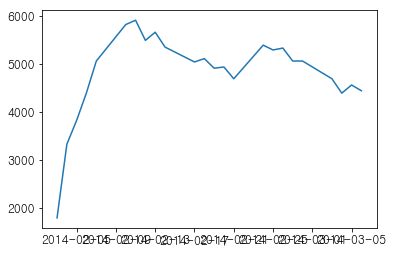

In [26]:
plt.plot(make_price_data('A053300'))

#### 함수 test

In [27]:
result

,P3_시초Rate,P4_종가Rate,상장일,유사도,종목명,코드,확정공모가
9,2.3,-16.9,2018-12-20,1.000000,위지윅스튜디오,A299900,11000.0
326,-3.1,14.9,2014-12-23,0.976561,넥스트엔터테인먼트월드,A160550,16300.0
276,53.8,30.0,2015-06-26,0.963811,에스엔텍,A160600,6500.0
99,-10.0,30.0,2018-11-30,0.961792,윙입푸드,A900340,2000.0
209,77.1,16.1,2015-12-22,0.956364,덱스터,A206560,14000.0
293,55.7,-10.1,2014-12-26,0.952590,휴메딕스,A200670,28000.0
274,39.4,-13.5,2015-06-30,0.949471,유테크,A178780,9000.0
300,-3.3,-14.5,2014-12-12,0.948233,알테오젠,A196170,26000.0
5,20.2,30.0,2018-12-24,0.946512,유틸렉스,A263050,50000.0
305,15.3,-3.0,2014-12-15,0.945957,비씨월드제약,A200780,15700.0


In [28]:
result['상장일'] = pd.to_datetime(result['상장일'])

In [29]:
price_table

,Unnamed: 0,code,시가,고가,저가,종가,거래량,종목명
날짜,,,,,,,,
2014-03-06,1,A053300,4525,4570,4445,4450,1064823,한국정보인증
2014-03-05,2,A053300,4425,4695,4340,4570,3745773,한국정보인증
2014-03-04,3,A053300,4500,4520,4350,4400,2115084,한국정보인증
2014-03-03,4,A053300,4995,4995,4700,4700,1210043,한국정보인증
2014-02-28,5,A053300,5160,5290,5020,5070,1811448,한국정보인증
2014-02-27,6,A053300,5340,5400,5040,5070,2033665,한국정보인증
2014-02-26,7,A053300,5500,5700,5150,5340,5155209,한국정보인증
2014-02-25,8,A053300,5400,5440,5090,5300,2904645,한국정보인증
2014-02-24,9,A053300,4680,5400,4500,5400,4607491,한국정보인증


In [30]:
price_table.index

DatetimeIndex(['2014-03-06', '2014-03-05', '2014-03-04', '2014-03-03',
               '2014-02-28', '2014-02-27', '2014-02-26', '2014-02-25',
               '2014-02-24', '2014-02-21',
               ...
               '2019-01-09', '2019-01-08', '2019-01-07', '2019-01-04',
               '2019-01-03', '2019-01-02', '2018-12-28', '2018-12-27',
               '2018-12-26', '2018-12-24'],
              dtype='datetime64[ns]', name='날짜', length=8410, freq=None)

In [31]:
a = result.iloc[1]['상장일']

In [32]:
b = price_table.loc[a]

In [33]:
b

,Unnamed: 0,code,시가,고가,저가,종가,거래량,종목명
날짜,,,,,,,,
2014-12-23,4,A160550,15800,18150,15650,18150,2147704,넥스트엔터테인먼트월드
2014-12-23,4,A194510,24500,28450,24300,28100,600045,파티게임즈
2014-12-23,4,A196490,4710,4870,4670,4760,86630,디에이테크놀로지
2014-12-23,4,A124500,8460,9420,7350,8770,1979065,아이티센
2014-12-23,4,A149980,86000,90800,81000,90800,53739,하이로닉
2014-12-23,4,A112610,27450,27900,26700,26750,162380,씨에스윈드
2014-12-23,4,A200780,16450,17800,16200,17450,214314,비씨월드제약
2014-12-23,4,A200230,12750,13550,12450,12450,244501,텔콘
2014-12-23,4,A178920,7470,7470,7080,7140,524862,에스케이씨코오롱피아이


In [34]:
b[b['종목명'] == result.iloc[1]['종목명']]['시가'][0]

15800

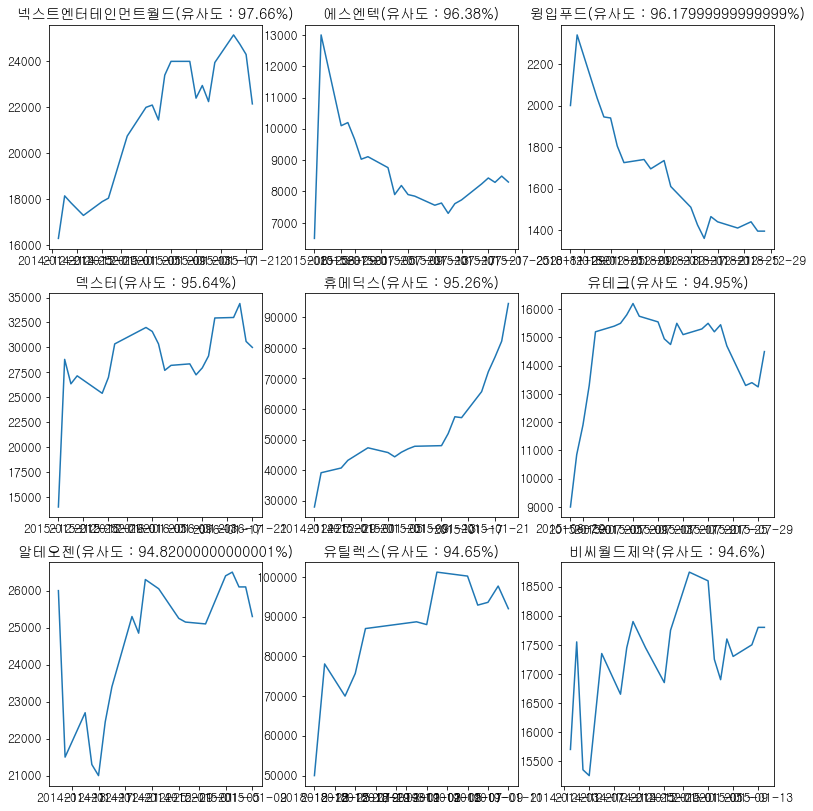

In [35]:
plt.figure(figsize=(13,14))

for i in range(1,10) :
    open_date = result.iloc[i]['상장일']
    open_table = price_table.loc[open_date]
    open_price = open_table[open_table['종목명'] == result.iloc[i]['종목명']]['시가'][0]
    title = "{0}(유사도 : {1}%)".format(result.iloc[i]['종목명'], result.iloc[i]['유사도'].round(4)*100, fontsize=24)
    plt.subplot(int('33'+str(i)), title = title)
    plt.plot(make_price_data(result.iloc[i]['코드']))
    

# 클러스터링

### Scikit Learn 라이브러리 활용




* http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html 링크 활용




* from sklearn.cluster import KMeans



* kmeans = KMeans(n_clusters="분류 수", random_state=0).fit(X)



* kmeans.labels_    : 전체 데이터 라벨 확인



* kmeans.predict    : 학습된 세트를 바탕으로 신규 데이터를 예측해줌



* kmeans.cluster_centers_  : 각각 클러스터의 중심 체크

#### clustering 을 위한 Dataset 생성

In [36]:
clu_data = [work.iloc[i][4:-2].values for i in range(len(work))]

In [37]:
len(clu_data)

336

#### Dataset 학습

In [78]:
kmeans = KMeans(n_clusters = 23, random_state = 0).fit(clu_data)

#### 전체 데이터의 label 확인

In [79]:
kmeans.labels_

array([ 3, 14,  5, 12, 21,  1, 19,  8,  9, 18, 19,  1, 22, 16, 22,  3, 16,
       22, 11, 14, 22, 16,  0, 12, 11,  3, 16, 11, 16, 11, 22,  4,  3,  7,
       18,  3, 12,  9,  3, 20,  7,  8, 17,  8, 22,  0, 16,  3, 17,  9,  9,
       12, 16,  6, 22,  3,  3, 12, 20,  4, 20, 11,  3,  3,  9,  1, 18, 15,
       20,  1,  5,  5,  3, 20, 12,  1,  5, 17,  3, 19, 16,  8,  7, 11,  4,
       12,  9, 22,  3, 13, 22, 22,  3, 21, 17,  0,  9,  8, 13, 18, 22,  9,
        3,  3, 19,  1,  6, 12,  6, 13,  3,  8,  6,  6,  1,  0,  0,  7,  3,
       12,  6,  7,  0, 12,  1,  7,  4,  7,  1, 19, 12,  3,  3,  1,  7, 20,
        7, 12,  4, 16,  7,  7,  8, 16,  8, 18,  5,  7, 10, 13,  1,  0,  9,
        4,  1,  8, 19, 13,  1,  5, 21,  4,  7, 22, 22, 19, 11,  4, 22,  7,
        0,  0, 22,  2, 22, 11, 21, 19, 11, 22,  2,  6, 12, 12,  9,  5,  1,
        5,  6,  8, 22,  6, 15,  4, 21,  3,  9, 14,  9,  7,  1, 21,  4,  2,
       12, 14, 18, 16,  3,  1,  8, 18, 19, 10,  8,  8,  0, 13,  2,  5,  0,
       21,  8,  0,  3,  0

#### work label 데이터 생성

In [80]:
work['label'] = kmeans.labels_

In [81]:
work['P4_종가Rate'].groupby(work['label']).mean()

label
0     -3.350000
1      3.929167
2      1.250000
3      3.896667
4      1.162500
5     -9.361538
6     -1.106667
7     -1.066667
8     -4.500000
9      1.780000
10     0.550000
11   -12.290000
12    -3.229167
13    -4.711111
14     6.600000
15    -4.700000
16    -0.976471
17    -0.100000
18     4.423077
19    10.073333
20    -4.306667
21    -0.533333
22    -2.781818
Name: P4_종가Rate, dtype: float64

In [69]:
work[work['label'] == 13]

,코드,종목명,확정공모가,상장일,F01_시장구분,F02_코넥스,F03_중국,F04_시가총액,F05_밴드대비,F06_기관확약,...,F11_상장월_10,F11_상장월_11,F11_상장월_12,F12_해당월,F13_직전수익률,F14_기관경쟁률,F15_공모경쟁률,P3_시초Rate,P4_종가Rate,label
6,A125210,아모그린텍,9900,2019-03-29,0.0,0.0,0.0,2.0,4.0,2.0,...,0,0,0,3.243184,3.388529,3.0,1.0,4.0,-1.0,13
53,A204020,엠코르셋,11500,2018-07-23,0.0,0.0,0.0,2.0,4.0,3.0,...,0,0,0,2.986266,2.666637,5.0,2.0,-3.9,17.2,13
165,A050960,수산아이앤티,11500,2016-10-11,0.0,0.0,0.0,1.0,4.0,2.0,...,1,0,0,4.274916,2.765412,3.0,1.0,0.0,30.0,13
212,A226350,아이엠텍,7500,2016-02-03,0.0,0.0,0.0,2.0,4.0,4.0,...,0,0,0,2.682397,4.499457,2.0,2.0,26.7,30.0,13
238,A217820,엔에스,8000,2015-12-07,0.0,0.0,0.0,1.0,5.0,4.0,...,0,0,1,4.992887,2.138326,3.0,1.0,61.9,13.9,13
267,A127710,아시아경제,3600,2015-07-31,0.0,0.0,0.0,2.0,4.0,3.0,...,0,0,0,3.465736,3.480256,3.0,1.0,-10.0,29.9,13
274,A178780,유테크,9000,2015-06-30,0.0,0.0,0.0,1.0,4.0,2.0,...,0,0,0,3.996492,3.548246,4.0,1.0,39.4,-13.5,13
278,A214310,세미콘라이트,11300,2015-06-25,0.0,0.0,0.0,1.0,2.0,2.0,...,0,0,0,3.996492,4.999976,3.0,2.0,1.8,30.0,13
280,A160980,싸이맥스,16300,2015-06-17,0.0,0.0,0.0,1.0,4.0,2.0,...,0,0,0,3.996492,4.866904,3.0,3.0,-6.7,-7.9,13
292,A080580,오킨스전자,7100,2014-12-24,0.0,0.0,0.0,1.0,5.0,1.0,...,0,0,1,4.992887,4.263975,3.0,1.0,54.9,15.0,13


(array([2., 2., 0., 2., 1., 0., 3., 0., 0., 5.]),
 array([-14.9 , -10.41,  -5.92,  -1.43,   3.06,   7.55,  12.04,  16.53,
         21.02,  25.51,  30.  ]),
 <a list of 10 Patch objects>)

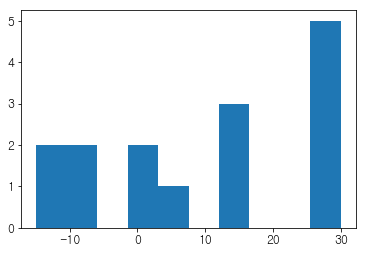

In [82]:
plt.hist(work[work['label'] == 19]['P4_종가Rate'])

In [84]:
work[work['label'] == 19]['P4_종가Rate'].describe()

count    15.000000
mean     10.073333
std      16.927850
min     -14.900000
25%      -4.450000
50%      13.900000
75%      28.000000
max      30.000000
Name: P4_종가Rate, dtype: float64